# Informe Técnico - Examen Transversal:

Integrantes:
* Pamela Aldana
* Nicole Asenjo

Docente:  Carlos Correa   

Sección:MACHINE LEARNING_003V

# Caso de Machine Learning

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import seaborn as sns
from seaborn import boxplot
from numpy import array

# Gráficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    name = fn

df = pd.read_excel(name)  # Usa read_excel para leer archivos de Excel
df.head(10)


 ## FASE 1 : COMPRENDER EL NEGOCIO

#El caso "Banco Monopoly/Dormammu"
El banco extranjero llamado "Dormammu" adquiere el banco chileno Monopoly . Dormammu ha encargado a sus ingenieros realizar un análisis de los clientes de Monopoly, comprendiendo su comportamiento y patrones de uso de productos financieros, con el objetivo de desarrollar una estrategia efectiva para abordar este nuevo mercado.

En la base de datos hay que utilizar metodologia Crisp-DM, seleccionar las variables relevantes para su interpretación y proporcionar la información necesaria a los propietarios de Dormammu para que puedan comprender a los clientes de Monopoly y desarrollar una estrategia efectiva para abordar este nuevo mercado.






#Datos:
 La base de datos muestra  información clientes de Monopoly que contiene 12 meses de información mensual para cada cliente, lo que resulta en un total de 574 variables y 51124 registros.


#Variables :
Las variables Cuantitativa discreta son las de tipo  int64(53). Las variables Cuantitativa continua son las de tipo float64(508). Las variables Cualitativas son la de tipo object(13) .








---



#Objetivo:
 Predecir las caracteristicas del clientes que determinan el Monto de pagos de deuda nacional del cliente en el mes X (PagoNac_T12), pero solo con promedios del mes 12



# Variables categóricas y las numéricas


# Target   numerico: PagoNac_T12     float64 : Monto de pagos de deuda nacional del cliente en el mes X


##VARIABLE objetivo CATEGORICA:
Target: Indicador de pago de deuda (0 paga la totalidad del monto, 1 paga el monto mínimo de la deuda). Es una variable cuantitativa discreta de dtype: int64.

---



In [ ]:
df2=df

In [ ]:
df1=df

In [ ]:
df.info()

NameError: ignored

## FASE 2 : COMPRENDER LO DATOS




In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.

# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.

# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

##Analisis exploratorio de los datos

Cantidad de registros y variables en el conjunto de datos.

Este codigo nos entrega la informacion del total de filas que es 51124 y el total de columnas que es 574.

In [ ]:
df.shape

(51124, 574)

df.columns nos muestra el nombre de las variables

In [ ]:
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01',
       'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target'],
      dtype='object', length=574)

In [ ]:
df.info()

NameError: ignored

# Estadísticas descriptivas para las variables numéricas (media, mediana, desviación estándar)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,51124.0,25562.500000,14758.371918,1.00,12781.75,25562.5,38343.25,51124.00
Subsegmento,51124.0,182.024274,29.276596,151.00,160.00,170.0,210.00,959.00
Region,51071.0,10.828220,3.392703,1.00,9.00,13.0,13.00,13.00
Edad,51124.0,38.702879,13.302573,9.00,28.00,35.0,46.00,104.00
Renta,37759.0,663077.078726,409279.460268,1.00,419999.00,567012.0,814903.50,13089327.00
...,...,...,...,...,...,...,...,...
EeccInt_T01,51124.0,7.323155,108.161194,-7886.76,0.00,0.0,0.00,3929.81
UsoL1_T01,51124.0,184092.343547,289173.134339,-3763996.60,17707.50,81129.0,227814.50,6911556.00
UsoL2_T01,51124.0,136032.715750,432538.882162,-4.00,0.00,29646.5,102102.25,11785487.00
UsoLI_T01,51124.0,8.294372,113.215624,-7785.12,0.00,0.0,0.00,3929.81


In [ ]:
#Moda de todas las columnas
df.mode()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,170.0,H,13.0,27.0,400000.0,10.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,R,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51120,51121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51121,51122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51122,51123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Mediana de todas las columnas
df.median()

Id              25562.5
Subsegmento       170.0
Region             13.0
Edad               35.0
Renta          567012.0
                 ...   
EeccInt_T01         0.0
UsoL1_T01       81129.0
UsoL2_T01       29646.5
UsoLI_T01           0.0
target              0.0
Length: 561, dtype: float64

La mediana representa la mitad de los datos.Ordenados de menor a mayor.
 La mitad de las personas en ese conjunto de datos tienen edades menores o iguales a 35 años, y la otra mitad tiene edades mayores o iguales a 35 años.
La mitad de las observaciones en ese conjunto de datos tienen  rentas menores o iguales a 567012 , y la otra mitad tiene rentas mayores o iguales a 567012.

In [ ]:
#Media de todas las columnas
df.mean()

Id              25562.500000
Subsegmento       182.024274
Region             10.828220
Edad               38.702879
Renta          663077.078726
                   ...      
EeccInt_T01         7.323155
UsoL1_T01      184092.343547
UsoL2_T01      136032.715750
UsoLI_T01           8.294372
target              0.089977
Length: 561, dtype: float64

La media representa el promedio:
UsoL1_T01 : el Monto de deuda en la linea de compras internacionales en la TC en el mes 01 es de 184092 en promedio por cliente

##Analisis target numerico :  PagoNac_T12




In [ ]:
pd.DataFrame([df["PagoNac_T12"].mean(), df["PagoNac_T12"].median(), df["PagoNac_T12"].mode(), df["PagoNac_T12"].std(), df["PagoNac_T12"].var(), df["PagoNac_T12"].max() - df["PagoNac_T12"].min()],
             index=['Media', 'Mediana', 'Moda', 'Desviacion Estandar', 'Varianza', 'Rango'], columns=['PagoNac_T12'])

,PagoNac_T12
Media,72569.598932
Mediana,26275.0
Moda,"0 0.0 Name: PagoNac_T12, dtype: float64"
Desviacion Estandar,184776.192417
Varianza,34142241284.133438
Rango,13873295.0


Los datos de la variable "PagoNac_T12" se ven altamente dispersos, con una media y una mediana muy diferentes . La presencia de valores atípicos puede estar afectando la media y la desviación estándar. La moda indica que 0 es el valor más común.

-Media : El valor medio o promedio de la variable es de aproximadamente 72569.60.
-Mediana: La mediana de la variable es de 26275.0. Esto indica que la mitad de los valores de "PagoNac_T12" son iguales o menores a 26,275.0 y la otra mitad son iguales o mayores a 26,275.0. La mediana es menos sensible a los valores atípicos en comparación con la media.
-Desviación Estándar: La desviación estándar es alta, con un valor de aproximadamente 184776.19. Esto indica que los valores de "PagoNac_T12" están bastante dispersos alrededor de la media. Una desviación estándar alta sugiere una variabilidad significativa en los datos.
-Varianza: La varianza es una medida de la dispersión de los datos, y su valor es de aproximadamente 34142241284.13. Es el cuadrado de la desviación estándar y refleja la variabilidad en los valores de "PagoNac_T12". Una varianza alta también indica una gran variabilidad en los datos.
-Rango: El rango es la diferencia entre el valor máximo y el valor mínimo en la variable.Es de 13873295.0, lo que significa que la diferencia entre el valor máximo y el valor mínimo de "PagoNac_T12" es bastante grande

In [ ]:
df['PagoNac_T12'].describe()

count    4.287300e+04
mean     7.256960e+04
std      1.847762e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.627500e+04
75%      8.268600e+04
max      1.387330e+07
Name: PagoNac_T12, dtype: float64

La diferencia de valores mínimos en 0 y un valor máximo significativamente mayor sugiere una distribución sesgada hacia la derecha, con valores más bajos siendo más comunes y valores extremadamente altos siendo menos comunes. La desviación estándar alta también indica una variabilidad significativa en los datos.

- Percentil 25 (Q1): El valor del primer cuartil (25%) es 0. Esto significa que el 25% de los valores en la variable "PagoNac_T12" son iguales o menores a 0.
- Percentil 50 (Q2): El valor del segundo cuartil (50%) es 26275.0, que corresponde a la mediana. Esto indica que el 50% de los valores en la variable "PagoNac_T12" son iguales o menores a 26275.0, y el otro 50% son iguales o mayores a este valor. La mediana representa la posición central en la distribución de los datos.
- Percentil 75 (Q3): El valor del tercer cuartil (75%) es 82686.0. Esto significa que el 75% de los valores en la variable "PagoNac_T12" son iguales o menores a 82686.0. Solo el 25% restante de los valores son mayores que este valor.

<Axes: xlabel='PagoNac_T12', ylabel='Density'>

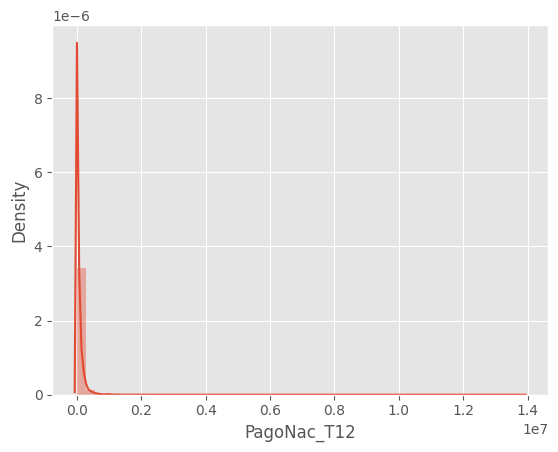

In [ ]:
# Procedemos a revisar la distribución de la variable objetivo
#
sns.distplot(df['PagoNac_T12'])

 La variable "PagoNac_T12" muestra un sesgo a la derecha, lo que significa que la mayoría de los valores están concentrados en el extremo izquierdo de la distribución, mientras que hay algunos valores extremadamente altos en el extremo derecho. Esto puede tener implicaciones importantes en el análisis y la interpretación de los datos, ya que los valores extremadamente altos pueden influir en medidas como la media y deben considerarse en el contexto del negocio o la investigación.

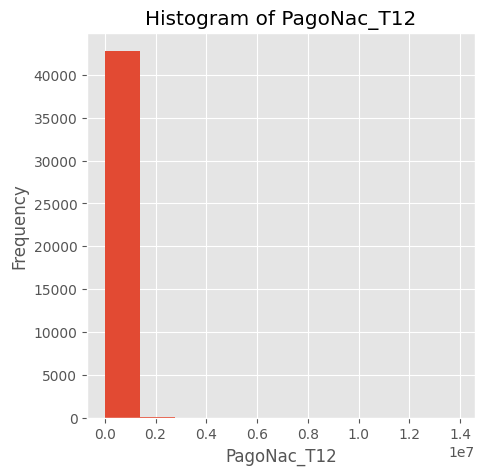

In [ ]:
#Histograma de la  variable target(Cantidad de kills efectuados por el jugador durante la partida o la ronda)
plt.figure(figsize=(5,5))
plt.hist(x = df['PagoNac_T12'], bins = 10)
plt.xlabel("PagoNac_T12")
plt.ylabel("Frequency")
plt.title("Histogram of PagoNac_T12")
plt.show()

El histograma de "PagoNac_T12 "muestra
Tambien se puede concluir que  el indicador 0.0 a 0.1  tiene mayor frecuencia . Esto puede producir que se sesgue el modelo hacia la mayoria.

#Visualizacion de  distribuciones de variables numéricas y categóricas utilizando gráficos.

#Variables Numericas

In [ ]:
col_num2=[ 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'Fac_T12','FacCN_T12','FacCCOT_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2CC_T12', 'PagoNac_T12', 'EeccNac_T12','UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12']
col_prom=['Region','Renta','Subsegmento','Edad','Antiguedad','EeccInt_T12','EeccNac_T12','Fac_T12','FacAI_T12','FacAN_T12','FacCCOT_T12','FacCCPC_T12','FacCI_T12','FacCN_T12','FacCOL_T12','FacDebAtm_T12','FacDebCom_T12','FacPAT_T12','UsoL1_T12','UsoL2_T12','UsoLI_T12','Col_T12']

In [ ]:
col_num=['Id', 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI_T11', 'FlgActPAT_T11', 'FlgActCCPC_T11', 'FlgActCCOT_T11', 'FlgActCOL_T11', 'Fac_T11', 'Txs_T11', 'FacCN_T11', 'TxsCN_T11', 'FacCI_T11', 'TxsCI_T11', 'FacAN_T11', 'TxsAN_T11', 'FacAI_T11', 'TxsAI_T11', 'FacPAT_T11', 'TxsPAT_T11', 'FacCCPC_T11', 'TxsCCPC_T11', 'FacCCOT_T11', 'TxsCCOT_T11', 'FacCOL_T11', 'TxsCOL_T11', 'FacDebCom_T11', 'TxsDebCom_T11', 'FacDebAtm_T11', 'TxsDebAtm_T11', 'Col_T11', 'ColL1T0_T11', 'ColL1TE_T11', 'ColL2T0_T11', 'ColL2AC_T11', 'ColL2CC_T11', 'ColMx_T11', 'PagoNac_T11', 'PagoInt_T11', 'EeccNac_T11', 'EeccInt_T11', 'UsoL1_T11', 'UsoL2_T11', 'UsoLI_T11', 'FlgAct_T10', 'FlgActCN_T10', 'FlgActCI_T10', 'FlgActAN_T10', 'FlgActAI_T10', 'FlgActPAT_T10', 'FlgActCCPC_T10', 'FlgActCCOT_T10', 'FlgActCOL_T10', 'Fac_T10', 'Txs_T10', 'FacCN_T10', 'TxsCN_T10', 'FacCI_T10', 'TxsCI_T10', 'FacAN_T10', 'TxsAN_T10', 'FacAI_T10', 'TxsAI_T10', 'FacPAT_T10', 'TxsPAT_T10', 'FacCCPC_T10', 'TxsCCPC_T10', 'FacCCOT_T10', 'TxsCCOT_T10', 'FacCOL_T10', 'TxsCOL_T10', 'FacDebCom_T10', 'TxsDebCom_T10', 'FacDebAtm_T10', 'TxsDebAtm_T10', 'Col_T10', 'ColL1T0_T10', 'ColL1TE_T10', 'ColL2T0_T10', 'ColL2AC_T10', 'ColL2CC_T10', 'ColMx_T10', 'PagoNac_T10', 'PagoInt_T10', 'EeccNac_T10', 'EeccInt_T10', 'UsoL1_T10', 'UsoL2_T10', 'UsoLI_T10', 'FlgAct_T09', 'FlgActCN_T09', 'FlgActCI_T09', 'FlgActAN_T09', 'FlgActAI_T09', 'FlgActPAT_T09', 'FlgActCCPC_T09', 'FlgActCCOT_T09', 'FlgActCOL_T09', 'Fac_T09', 'Txs_T09', 'FacCN_T09', 'TxsCN_T09', 'FacCI_T09', 'TxsCI_T09', 'FacAN_T09', 'TxsAN_T09', 'FacAI_T09', 'TxsAI_T09', 'FacPAT_T09', 'TxsPAT_T09', 'FacCCPC_T09', 'TxsCCPC_T09', 'FacCCOT_T09', 'TxsCCOT_T09', 'FacCOL_T09', 'TxsCOL_T09', 'FacDebCom_T09', 'TxsDebCom_T09', 'FacDebAtm_T09', 'TxsDebAtm_T09', 'Col_T09', 'ColL1T0_T09', 'ColL1TE_T09', 'ColL2T0_T09', 'ColL2AC_T09', 'ColL2CC_T09', 'ColMx_T09', 'PagoNac_T09', 'PagoInt_T09', 'EeccNac_T09', 'EeccInt_T09', 'UsoL1_T09', 'UsoL2_T09', 'UsoLI_T09', 'FlgAct_T08', 'FlgActCN_T08', 'FlgActCI_T08', 'FlgActAN_T08', 'FlgActAI_T08', 'FlgActPAT_T08', 'FlgActCCPC_T08', 'FlgActCCOT_T08', 'FlgActCOL_T08', 'Fac_T08', 'Txs_T08', 'FacCN_T08', 'TxsCN_T08', 'FacCI_T08', 'TxsCI_T08', 'FacAN_T08', 'TxsAN_T08', 'FacAI_T08', 'TxsAI_T08', 'FacPAT_T08', 'TxsPAT_T08', 'FacCCPC_T08', 'TxsCCPC_T08', 'FacCCOT_T08', 'TxsCCOT_T08', 'FacCOL_T08', 'TxsCOL_T08', 'FacDebCom_T08', 'TxsDebCom_T08', 'FacDebAtm_T08', 'TxsDebAtm_T08', 'Col_T08', 'ColL1T0_T08', 'ColL1TE_T08', 'ColL2T0_T08', 'ColL2AC_T08', 'ColL2CC_T08', 'ColMx_T08', 'PagoNac_T08', 'PagoInt_T08', 'EeccNac_T08', 'EeccInt_T08', 'UsoL1_T08', 'UsoL2_T08', 'UsoLI_T08', 'FlgAct_T07', 'FlgActCN_T07', 'FlgActCI_T07', 'FlgActAN_T07', 'FlgActAI_T07', 'FlgActPAT_T07', 'FlgActCCPC_T07', 'FlgActCCOT_T07', 'FlgActCOL_T07', 'Fac_T07', 'Txs_T07', 'FacCN_T07', 'TxsCN_T07', 'FacCI_T07', 'TxsCI_T07', 'FacAN_T07', 'TxsAN_T07', 'FacAI_T07', 'TxsAI_T07', 'FacPAT_T07', 'TxsPAT_T07', 'FacCCPC_T07', 'TxsCCPC_T07', 'FacCCOT_T07', 'TxsCCOT_T07', 'FacCOL_T07', 'TxsCOL_T07', 'FacDebCom_T07', 'TxsDebCom_T07', 'FacDebAtm_T07', 'TxsDebAtm_T07', 'Col_T07', 'ColL1T0_T07', 'ColL1TE_T07', 'ColL2T0_T07', 'ColL2AC_T07', 'ColL2CC_T07', 'ColMx_T07', 'PagoNac_T07', 'PagoInt_T07', 'EeccNac_T07', 'EeccInt_T07', 'UsoL1_T07', 'UsoL2_T07', 'UsoLI_T07', 'FlgAct_T06', 'FlgActCN_T06', 'FlgActCI_T06', 'FlgActAN_T06', 'FlgActAI_T06', 'FlgActPAT_T06', 'FlgActCCPC_T06', 'FlgActCCOT_T06', 'FlgActCOL_T06', 'Fac_T06', 'Txs_T06', 'FacCN_T06', 'TxsCN_T06', 'FacCI_T06', 'TxsCI_T06', 'FacAN_T06', 'TxsAN_T06', 'FacAI_T06', 'TxsAI_T06', 'FacPAT_T06', 'TxsPAT_T06', 'FacCCPC_T06', 'TxsCCPC_T06', 'FacCCOT_T06', 'TxsCCOT_T06', 'FacCOL_T06', 'TxsCOL_T06', 'FacDebCom_T06', 'TxsDebCom_T06', 'FacDebAtm_T06', 'TxsDebAtm_T06', 'Col_T06', 'ColL1T0_T06', 'ColL1TE_T06', 'ColL2T0_T06', 'ColL2AC_T06', 'ColL2CC_T06', 'ColMx_T06', 'PagoNac_T06', 'PagoInt_T06', 'EeccNac_T06', 'EeccInt_T06', 'UsoL1_T06', 'UsoL2_T06', 'UsoLI_T06', 'FlgAct_T05', 'FlgActCN_T05', 'FlgActCI_T05', 'FlgActAN_T05', 'FlgActAI_T05', 'FlgActPAT_T05', 'FlgActCCPC_T05', 'FlgActCCOT_T05', 'FlgActCOL_T05', 'Fac_T05', 'Txs_T05', 'FacCN_T05', 'TxsCN_T05', 'FacCI_T05', 'TxsCI_T05', 'FacAN_T05', 'TxsAN_T05', 'FacAI_T05', 'TxsAI_T05', 'FacPAT_T05', 'TxsPAT_T05', 'FacCCPC_T05', 'TxsCCPC_T05', 'FacCCOT_T05', 'TxsCCOT_T05', 'FacCOL_T05', 'TxsCOL_T05', 'FacDebCom_T05', 'TxsDebCom_T05', 'FacDebAtm_T05', 'TxsDebAtm_T05', 'Col_T05', 'ColL1T0_T05', 'ColL1TE_T05', 'ColL2T0_T05', 'ColL2AC_T05', 'ColL2CC_T05', 'ColMx_T05', 'PagoNac_T05', 'PagoInt_T05', 'EeccNac_T05', 'EeccInt_T05', 'UsoL1_T05', 'UsoL2_T05', 'UsoLI_T05', 'FlgAct_T04', 'FlgActCN_T04', 'FlgActCI_T04', 'FlgActAN_T04', 'FlgActAI_T04', 'FlgActPAT_T04', 'FlgActCCPC_T04', 'FlgActCCOT_T04', 'FlgActCOL_T04', 'Fac_T04', 'Txs_T04', 'FacCN_T04', 'TxsCN_T04', 'FacCI_T04', 'TxsCI_T04', 'FacAN_T04', 'TxsAN_T04', 'FacAI_T04', 'TxsAI_T04', 'FacPAT_T04', 'TxsPAT_T04', 'FacCCPC_T04', 'TxsCCPC_T04', 'FacCCOT_T04', 'TxsCCOT_T04', 'FacCOL_T04', 'TxsCOL_T04', 'FacDebCom_T04', 'TxsDebCom_T04', 'FacDebAtm_T04', 'TxsDebAtm_T04', 'Col_T04', 'ColL1T0_T04', 'ColL1TE_T04', 'ColL2T0_T04', 'ColL2AC_T04', 'ColL2CC_T04', 'ColMx_T04', 'PagoNac_T04', 'PagoInt_T04', 'EeccNac_T04', 'EeccInt_T04', 'UsoL1_T04', 'UsoL2_T04', 'UsoLI_T04', 'FlgAct_T03', 'FlgActCN_T03', 'FlgActCI_T03', 'FlgActAN_T03', 'FlgActAI_T03', 'FlgActPAT_T03', 'FlgActCCPC_T03', 'FlgActCCOT_T03', 'FlgActCOL_T03', 'Fac_T03', 'Txs_T03', 'FacCN_T03', 'TxsCN_T03', 'FacCI_T03', 'TxsCI_T03', 'FacAN_T03', 'TxsAN_T03', 'FacAI_T03', 'TxsAI_T03', 'FacPAT_T03', 'TxsPAT_T03', 'FacCCPC_T03', 'TxsCCPC_T03', 'FacCCOT_T03', 'TxsCCOT_T03', 'FacCOL_T03', 'TxsCOL_T03', 'FacDebCom_T03', 'TxsDebCom_T03', 'FacDebAtm_T03', 'TxsDebAtm_T03', 'Col_T03', 'ColL1T0_T03', 'ColL1TE_T03', 'ColL2T0_T03', 'ColL2AC_T03', 'ColL2CC_T03', 'ColMx_T03', 'PagoNac_T03', 'PagoInt_T03', 'EeccNac_T03', 'EeccInt_T03', 'UsoL1_T03', 'UsoL2_T03', 'UsoLI_T03', 'FlgAct_T02', 'FlgActCN_T02', 'FlgActCI_T02', 'FlgActAN_T02', 'FlgActAI_T02', 'FlgActPAT_T02', 'FlgActCCPC_T02', 'FlgActCCOT_T02', 'FlgActCOL_T02', 'Fac_T02', 'Txs_T02', 'FacCN_T02', 'TxsCN_T02', 'FacCI_T02', 'TxsCI_T02', 'FacAN_T02', 'TxsAN_T02', 'FacAI_T02', 'TxsAI_T02', 'FacPAT_T02', 'TxsPAT_T02', 'FacCCPC_T02', 'TxsCCPC_T02', 'FacCCOT_T02', 'TxsCCOT_T02', 'FacCOL_T02', 'TxsCOL_T02', 'FacDebCom_T02', 'TxsDebCom_T02', 'FacDebAtm_T02', 'TxsDebAtm_T02', 'Col_T02', 'ColL1T0_T02', 'ColL1TE_T02', 'ColL2T0_T02', 'ColL2AC_T02', 'ColL2CC_T02', 'ColMx_T02', 'PagoNac_T02', 'PagoInt_T02', 'EeccNac_T02', 'EeccInt_T02', 'UsoL1_T02', 'UsoL2_T02', 'UsoLI_T02', 'FlgAct_T01', 'FlgActCN_T01', 'FlgActCI_T01', 'FlgActAN_T01', 'FlgActAI_T01', 'FlgActPAT_T01', 'FlgActCCPC_T01', 'FlgActCCOT_T01', 'FlgActCOL_T01', 'Fac_T01', 'Txs_T01', 'FacCN_T01', 'TxsCN_T01', 'FacCI_T01', 'TxsCI_T01', 'FacAN_T01', 'TxsAN_T01', 'FacAI_T01', 'TxsAI_T01', 'FacPAT_T01', 'TxsPAT_T01', 'FacCCPC_T01', 'TxsCCPC_T01', 'FacCCOT_T01', 'TxsCCOT_T01', 'FacCOL_T01', 'TxsCOL_T01', 'FacDebCom_T01', 'TxsDebCom_T01', 'FacDebAtm_T01', 'TxsDebAtm_T01', 'Col_T01', 'ColL1T0_T01', 'ColL1TE_T01', 'ColL2T0_T01', 'ColL2AC_T01', 'ColL2CC_T01', 'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'target']


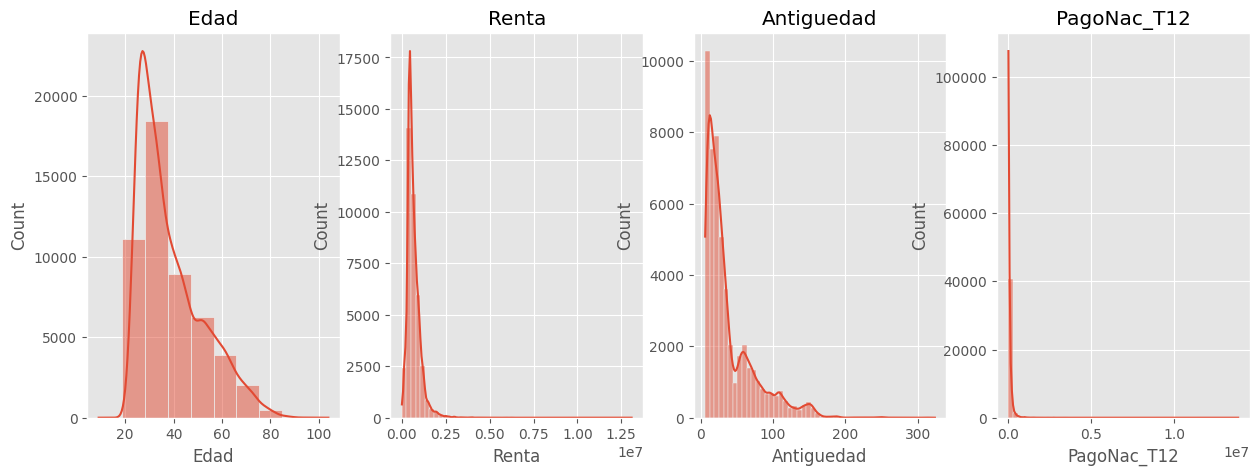

In [ ]:
# Dibujar histogramas
col_num = ['Edad', 'Renta', 'Antiguedad','PagoNac_T12']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Edad':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=df, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

- Observaciones:

- La mayor parte de los clientes  tiene edades entre los 28 y los 38 años, con sesgo hacia los 20-35años
- Los mayoria de los clientes  tienen Renta baja.Los datos están sesgados hacia la izquierda o tiene un sesgo negativo(La media es menor que la mediana.).Se debe utilizar  la mediana en lugar de la media, ya que la media puede verse afectada por los valores extremadamente bajos.
- la mayor cantidad de clientes son nuevos.

#Variables categoricas

>



In [ ]:
col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07',
                        'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']

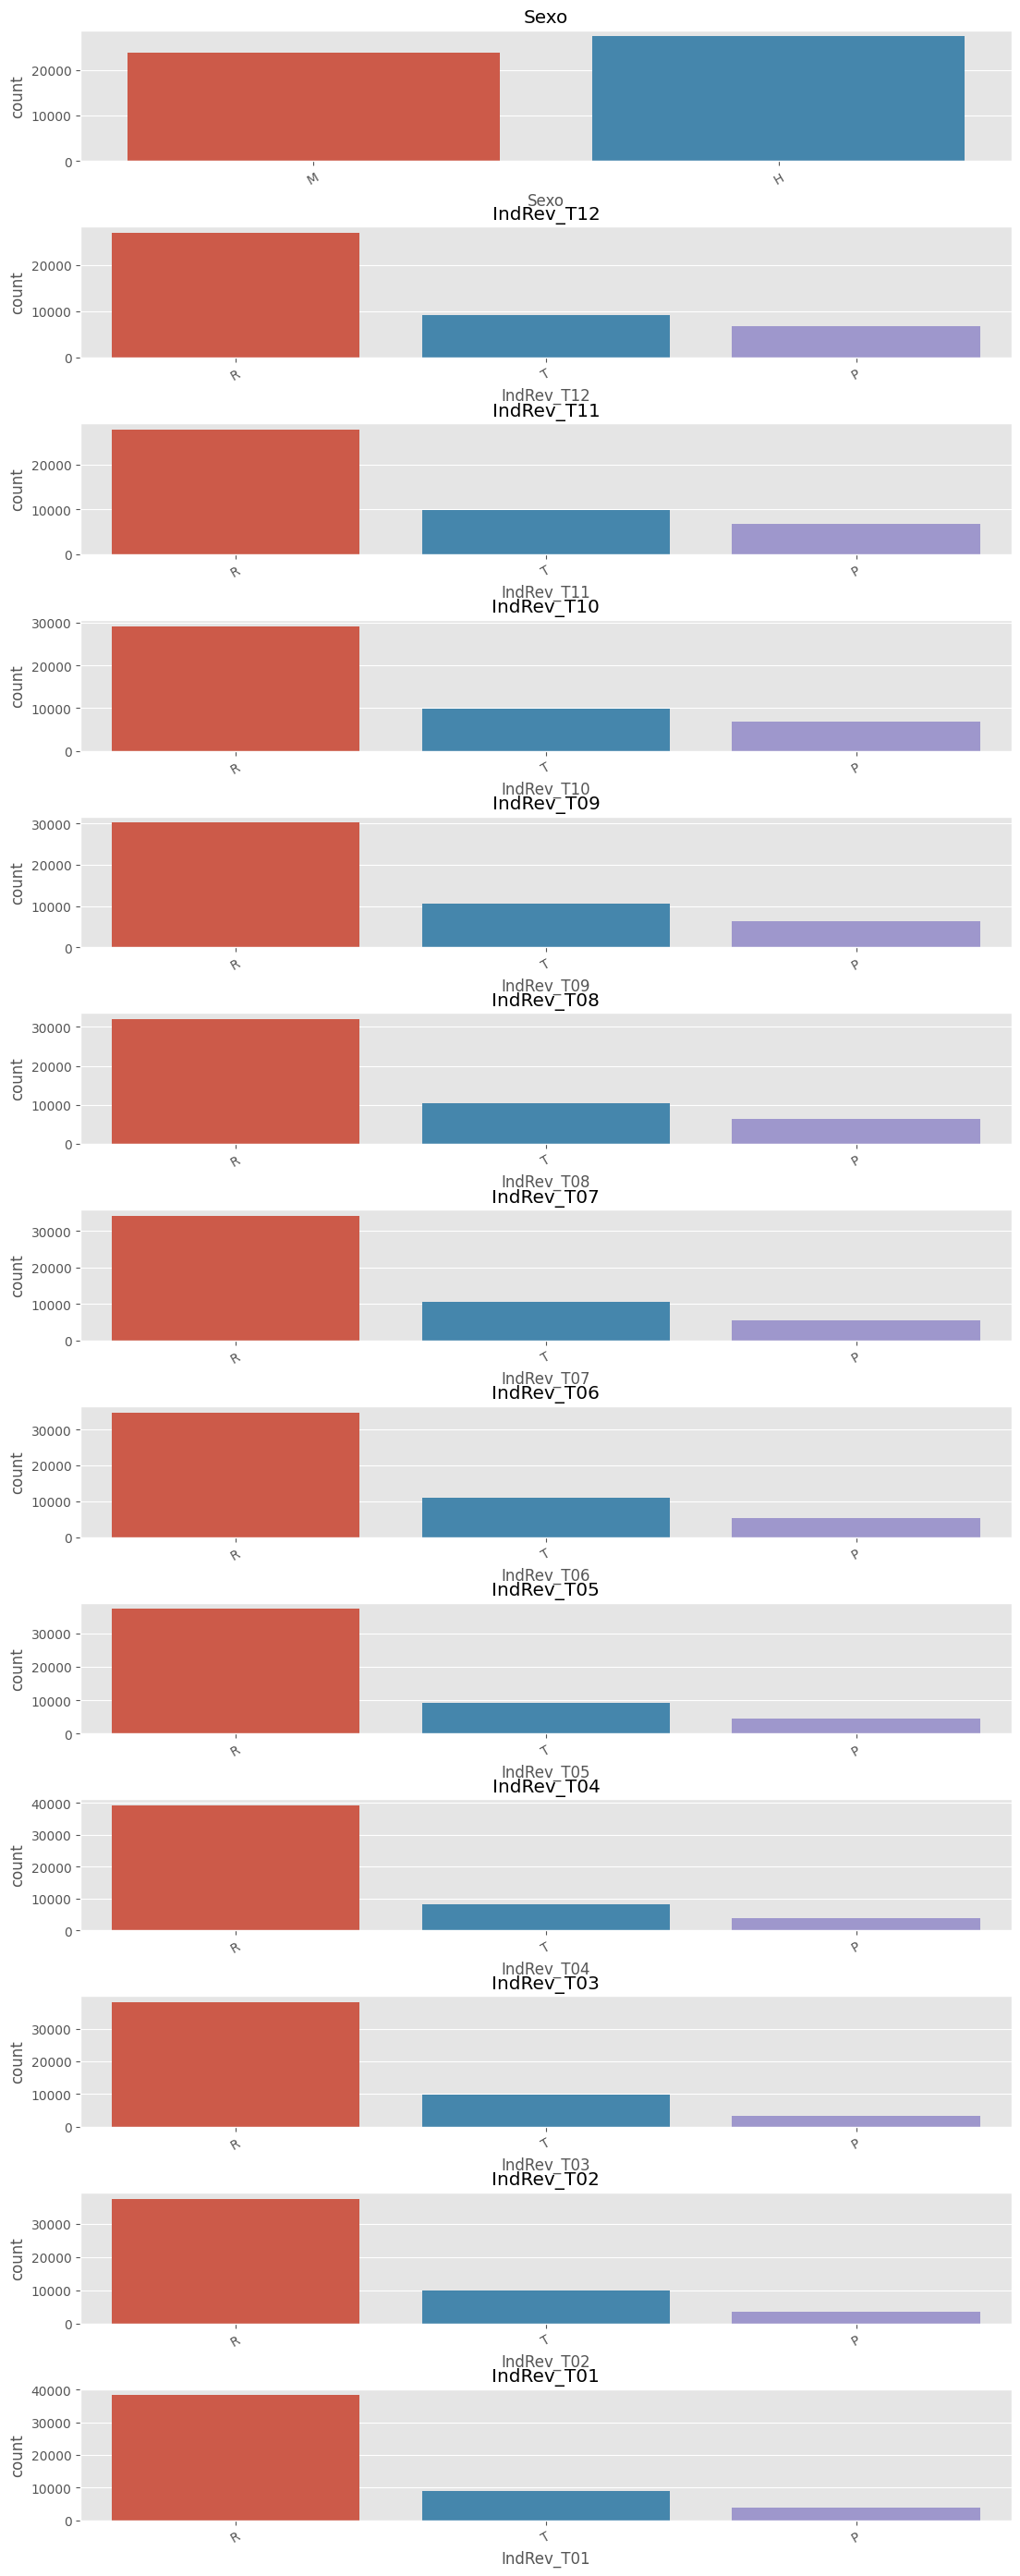

In [ ]:
# Tomemos las variables categóricas y generemos gráficos de barras
col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07',
                        'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']
# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(13,35))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

'R' subnivel es el que mas concentra datos

In [ ]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07',
                        'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']
for col in col_cat:
  print(f'Columna {col}: {df[col].unique()}{df[col].nunique()} subniveles')

Columna Sexo: ['M' 'H' nan]2 subniveles
Columna IndRev_T12: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T11: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T10: ['R' 'T' nan 'P']3 subniveles
Columna IndRev_T09: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T08: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T07: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T06: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T05: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T04: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T03: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T02: ['R' 'T' 'P' nan]3 subniveles
Columna IndRev_T01: ['R' 'T' 'P']3 subniveles


Observaciones:

Niveles de cada variable IndRev_: son 3 niveles
['R' 'T' 'P'].Tambien podemos observar valores nan.
Sexo tiene dos subniveles que tienen datos equilibrados y 1 null



In [ ]:
# Filtra las variables de tipo 'object'
col_cat = df.select_dtypes(include=['object'])

# Muestra las variables de tipo 'object'
print(col_cat)

      Sexo IndRev_T12 IndRev_T11 IndRev_T10 IndRev_T09 IndRev_T08 IndRev_T07  \
0        M          R          R          R          R          R          R   
1        H          R          R          R          R          R          R   
2        H          T          R          T          T          T          T   
3        H          R          R          R          R          R          R   
4        H          T          T          T          T          T          T   
...    ...        ...        ...        ...        ...        ...        ...   
51119    H          R          R          R          R          R          R   
51120    H          R          T          T          T          T          T   
51121    H          R          R          R          P          P          T   
51122    M        NaN        NaN          T          T          R          R   
51123    H          T          T          T          R          R          T   

      IndRev_T06 IndRev_T05 IndRev_T04 

# Valores nulos



In [ ]:
df.isna().sum(axis=0) # ver los datos despues de eliminar los nulos

Id              0
Subsegmento     0
Sexo            1
Region         53
Edad            0
               ..
UsoL1_T01       0
UsoL2_T01       0
UsoLI_T01       0
IndRev_T01      0
target          0
Length: 574, dtype: int64

In [ ]:
#CHEQUEAMOS SI HAY DATOS FALTANTES
df.columns[df.isnull().any()]

Index(['Sexo', 'Region', 'Renta', 'CambioPin', 'FlgAct_T12', 'FlgActCN_T12',
       'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12',
       ...
       'ColL2CC_T02', 'ColMx_T02', 'PagoNac_T02', 'PagoInt_T02', 'EeccNac_T02',
       'EeccInt_T02', 'UsoL1_T02', 'UsoL2_T02', 'UsoLI_T02', 'IndRev_T02'],
      dtype='object', length=510)

Por ejemplo :La columna sexo tiene 1 y region 53

In [ ]:
col_prom=['Region','Renta','Subsegmento','Edad','Antiguedad','EeccInt_T12','EeccNac_T12','Fac_T12','FacAI_T12','FacAN_T12','FacCCOT_T12','FacCCPC_T12','FacCI_T12','FacCN_T12','FacCOL_T12','FacDebAtm_T12','FacDebCom_T12','FacPAT_T12','UsoL1_T12','UsoL2_T12','UsoLI_T12','Col_T12']

In [ ]:
corr = df.corr()
corr[['PagoNac_T12']].sort_values(by = 'PagoNac_T12',ascending = False).style.background_gradient()

,PagoNac_T12
PagoNac_T12,1.000000
Fac_T12,0.219550
ColL1T0_T12,0.212997
ColL1T0_T11,0.211336
ColL2CC_T12,0.201034
FacCN_T12,0.197876
ColL1T0_T10,0.185801
Fac_T11,0.183890
Txs_T12,0.177296
Col_T12,0.173610


 Se describe la relación o asociación entre dos variables. En el contexto de la exploración de datos y el análisis de datos, la correlación nos proporciona información sobre cómo dos variables numéricas están relacionadas entre sí.

## FASE 3 : PREPARAR LOS DATOS


#Limpieza



Columnas irrelevantes (que no responden al **problema** que queremos resolver)



#Eliminar columnas irrelevantes
- Una columna categórica pero con un sólo nivel.
No existen el dataset
- Una columna numérica pero con un sólo valor.
No existen en dataset




In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07',
                        'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']
for col in col_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Sexo: 2 subniveles
Columna IndRev_T12: 3 subniveles
Columna IndRev_T11: 3 subniveles
Columna IndRev_T10: 3 subniveles
Columna IndRev_T09: 3 subniveles
Columna IndRev_T08: 3 subniveles
Columna IndRev_T07: 3 subniveles
Columna IndRev_T06: 3 subniveles
Columna IndRev_T05: 3 subniveles
Columna IndRev_T04: 3 subniveles
Columna IndRev_T03: 3 subniveles
Columna IndRev_T02: 3 subniveles
Columna IndRev_T01: 3 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.



#Verifiquemos  columnas numéricas:


In [ ]:
col_num1=[ 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'Fac_T12','FacCN_T12','FacCCOT_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2CC_T12', 'PagoNac_T12', 'EeccNac_T12','UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12']


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,51124.0,25562.500000,14758.371918,1.00,12781.75,25562.5,38343.25,51124.00
Subsegmento,51124.0,182.024274,29.276596,151.00,160.00,170.0,210.00,959.00
Region,51071.0,10.828220,3.392703,1.00,9.00,13.0,13.00,13.00
Edad,51124.0,38.702879,13.302573,9.00,28.00,35.0,46.00,104.00
Renta,37759.0,663077.078726,409279.460268,1.00,419999.00,567012.0,814903.50,13089327.00
...,...,...,...,...,...,...,...,...
EeccInt_T01,51124.0,7.323155,108.161194,-7886.76,0.00,0.0,0.00,3929.81
UsoL1_T01,51124.0,184092.343547,289173.134339,-3763996.60,17707.50,81129.0,227814.50,6911556.00
UsoL2_T01,51124.0,136032.715750,432538.882162,-4.00,0.00,29646.5,102102.25,11785487.00
UsoLI_T01,51124.0,8.294372,113.215624,-7785.12,0.00,0.0,0.00,3929.81


La columnas CambioPin tienen desviaciones estándar ("std") igual cero, lo que indica que  tienen un único valor.

Borraremos esta variable

# FILAS DUPLICADAS

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (51124, 574)
Tamaño del set después de eliminar las filas repetidas: (51124, 574)


#Errores tipográficos en variables categóricas
En una variable categórica pueden aparecer sub-niveles.Se deben unificar

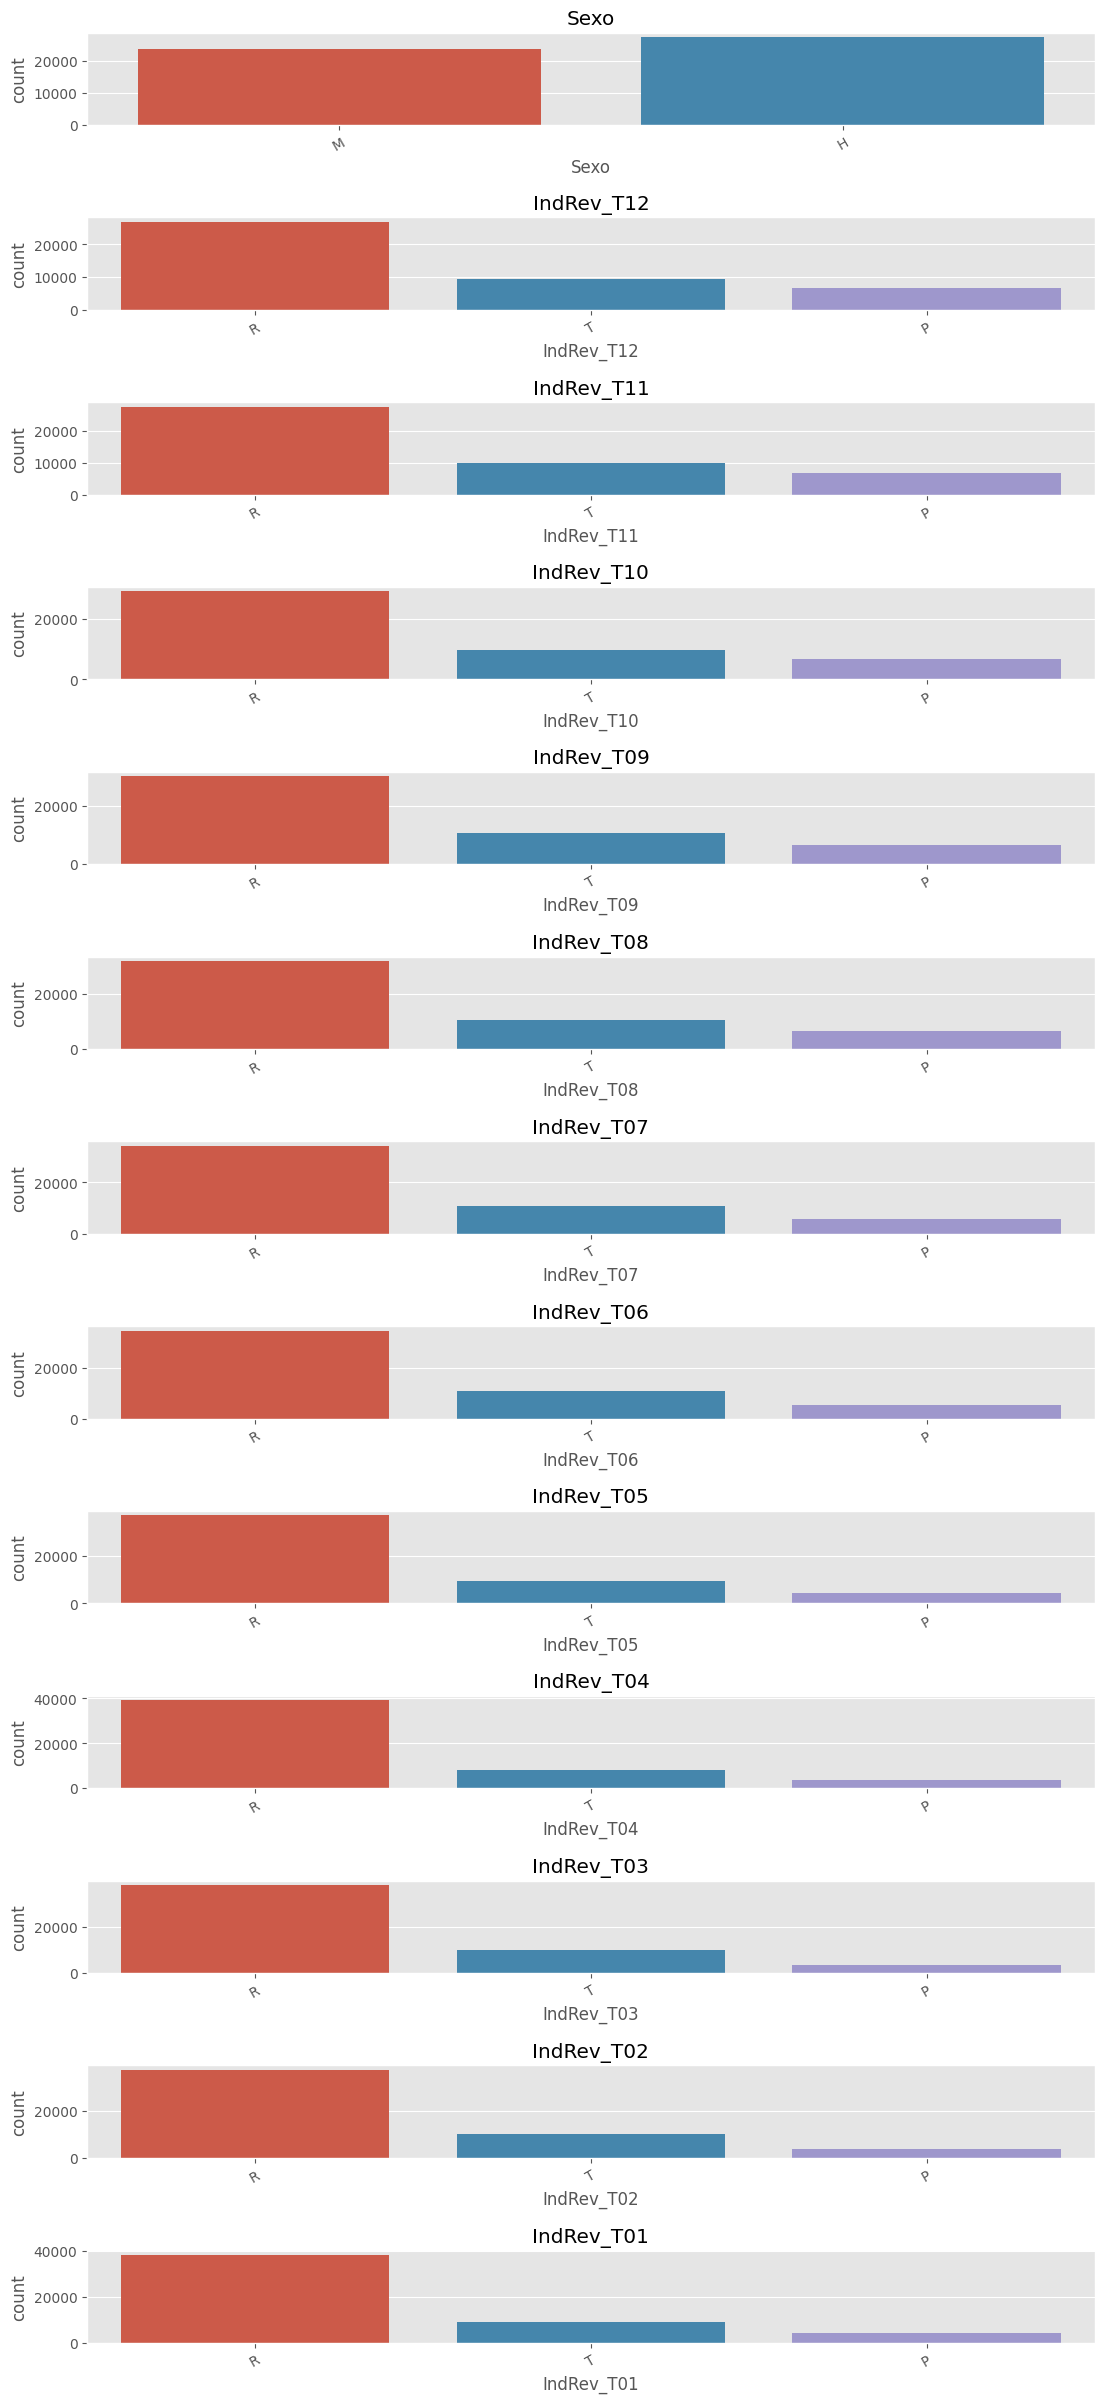

In [ ]:
# Graficar los subniveles de cada variable categórica
col_cat=['Sexo','IndRev_T12', 'IndRev_T11', 'IndRev_T10', 'IndRev_T09', 'IndRev_T08', 'IndRev_T07',
                        'IndRev_T06', 'IndRev_T05', 'IndRev_T04', 'IndRev_T03', 'IndRev_T02', 'IndRev_T01']

fig, ax = plt.subplots(nrows=13, ncols=1, figsize=(13,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Inicialmente se observa que NO haysub-niveles con el mismo nombre pero escritos en minúscula,  en mayúscula o con la primera letra en mayúscula.


# Datos faltantes

In [ ]:
df.isna().sum()

Id              0
Subsegmento     0
Sexo            1
Region         53
Edad            0
               ..
UsoL1_T01       0
UsoL2_T01       0
UsoLI_T01       0
IndRev_T01      0
target          0
Length: 574, dtype: int64

In [ ]:
# Missing data:

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
CambioPin,19388,0.379235
Renta,13365,0.261423
UsoL1_T12,8251,0.161392
TxsCCPC_T12,8251,0.161392
FacDebCom_T12,8251,0.161392
TxsCOL_T12,8251,0.161392
FacCOL_T12,8251,0.161392
TxsCCOT_T12,8251,0.161392
FacCCOT_T12,8251,0.161392
FacCCPC_T12,8251,0.161392


#Imputacion datos faltantes

In [ ]:
# Calcular la media de la variable "Región" (ignorando los valores NaN)
media_region = df['Region'].mean()

# Imputar los valores faltantes con la media
df['Region'].fillna(media_region, inplace=True)


In [ ]:
df.shape

(50835, 574)

##Eliminacion

In [ ]:
df= df.drop(['Id','CambioPin'], axis=1)


- Columnas que no guarde relación con el posible perfil del cliente con respecto al Monto de pagos de deuda nacional del cliente en el mes X


Voy a eliminar las variable'CambioPIn' con un 37% de datos faltantes ;no es  importantes a considerar al para el perfil de clientes que paga total del monto de deuda.


#OUTLIERS

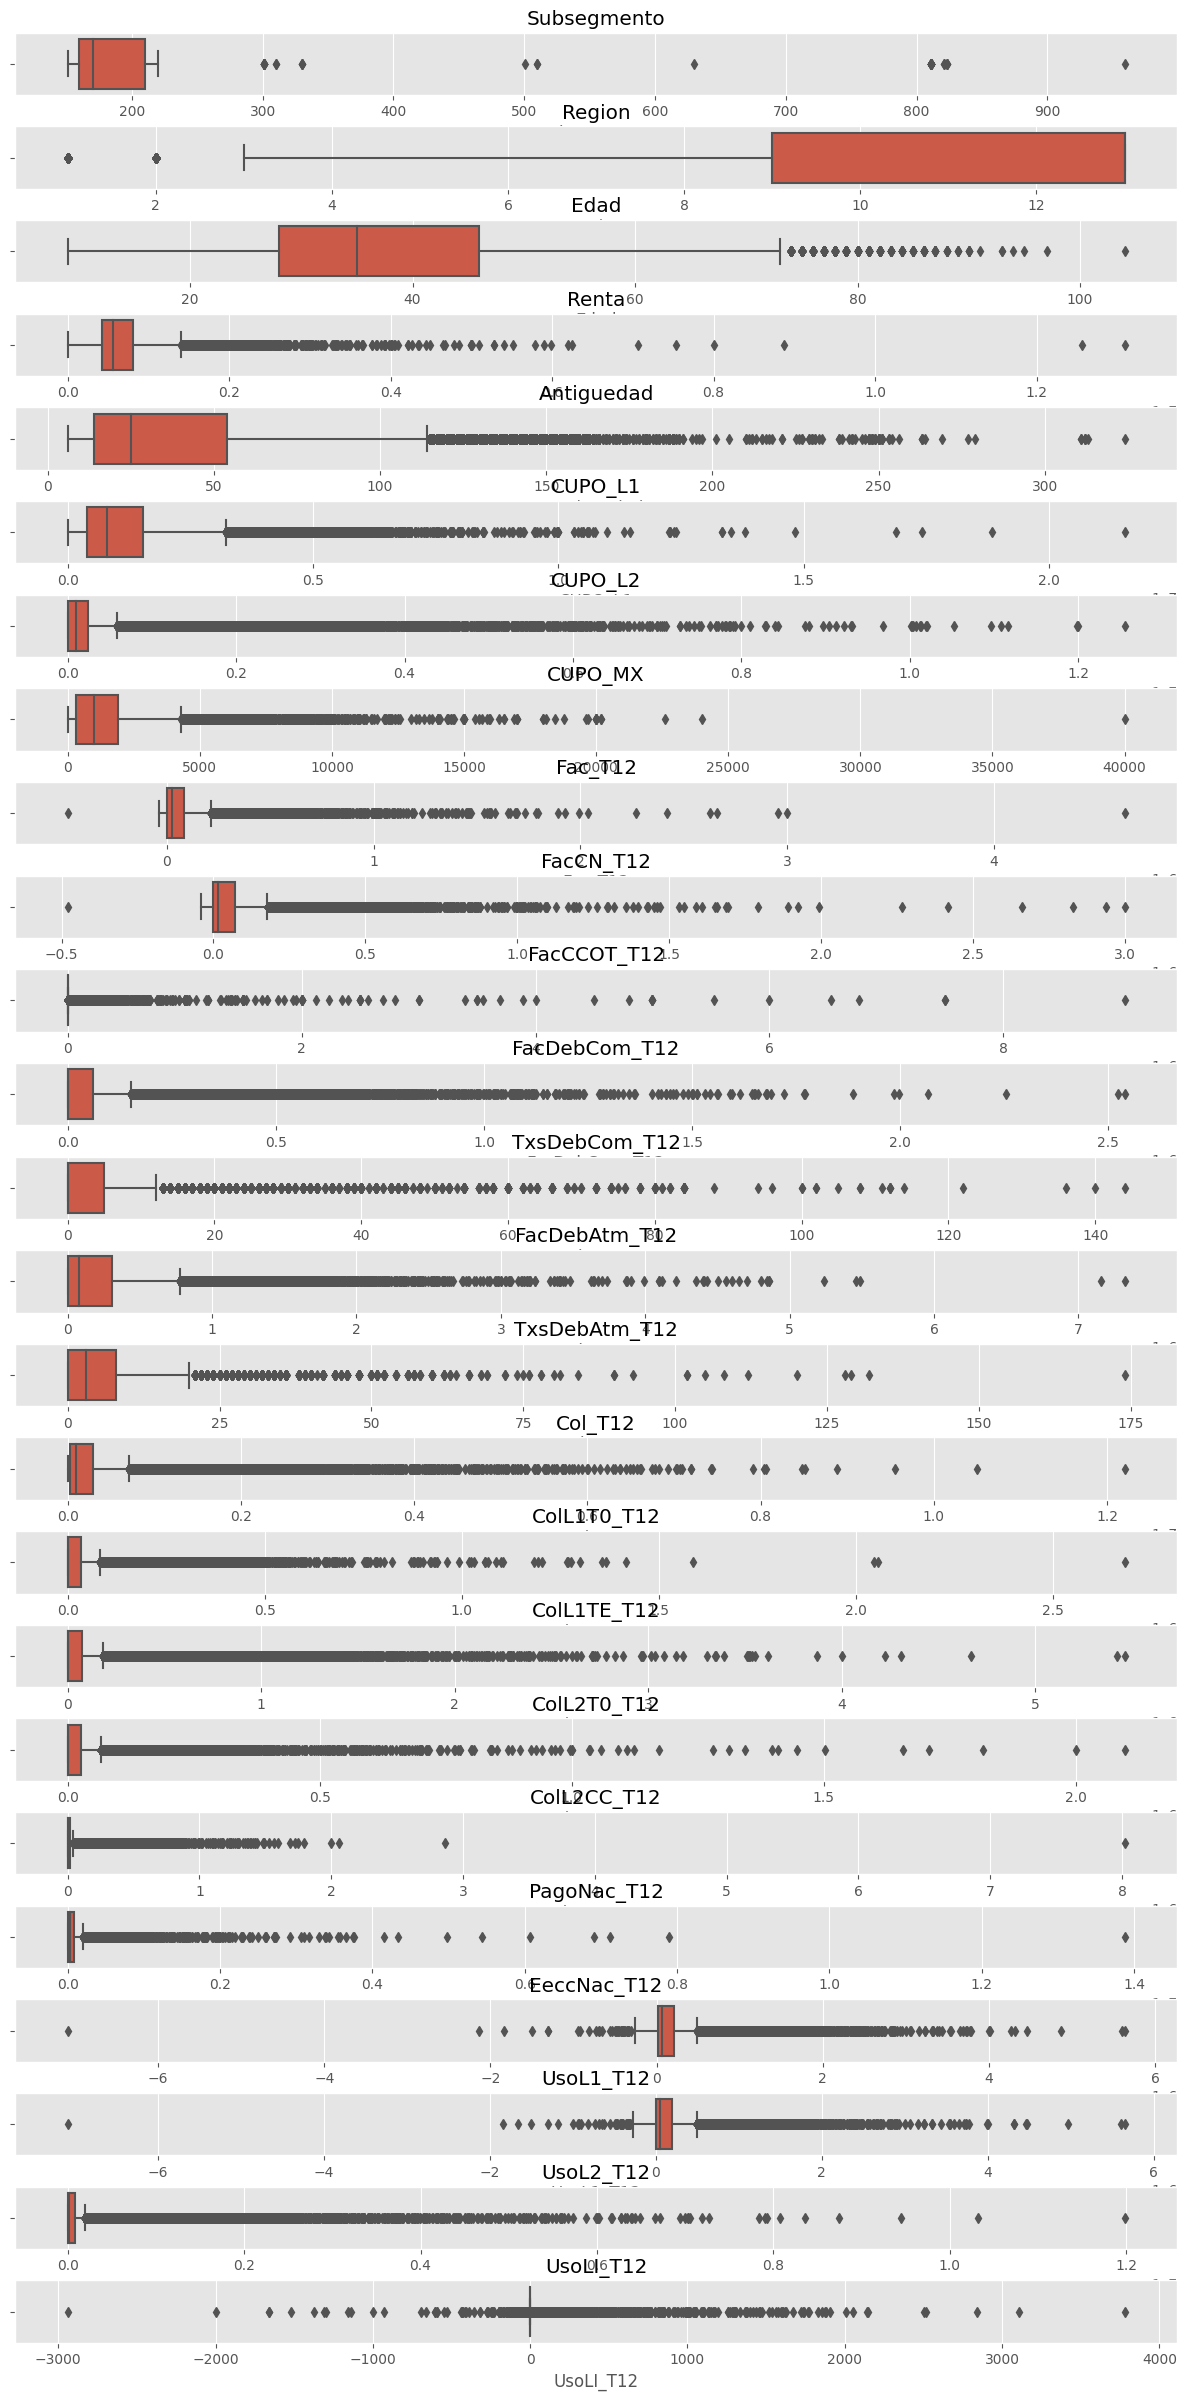

In [ ]:
# Generar gráficas individuales pues las variables numéricas
col_num=[ 'Subsegmento', 'Region', 'Edad', 'Renta', 'Antiguedad', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'Fac_T12','FacCN_T12','FacCCOT_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2CC_T12', 'PagoNac_T12', 'EeccNac_T12','UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12']

fig, ax = plt.subplots(nrows=25, ncols=1, figsize=(15,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)


In [ ]:
# Eliminar filas outliers con "edad">78
print(f'Tamaño del set antes de eliminar registros de edad: {df.shape}')
df = df[df['Edad']<=78]
print(f'Tamaño del set después de eliminar registros de edad: {df.shape}')

Tamaño del set antes de eliminar registros de edad: (51108, 574)
Tamaño del set después de eliminar registros de edad: (50835, 574)


Observaciones:

"Edad": los clientes tiene edades maximo  76 años



Originalmente tenía registros y 574 columnas. El dataset resultante tiene 50835, 574
filas



## FASE 4: MODELAMIENTO

---




## FASE 5 : EVALUACION DE MODELOS

## FASE 6: DESPLIEGUE